

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [17]:
import pandas as pd
import numpy as np

Считываем данные  из csv файла

In [166]:
df = pd.read_csv('adult.data', header=None, 
                 names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"],
                skipinitialspace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [19]:
df.groupby('sex').size()

sex
Female    10771
Male      21790
dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [26]:
df[(df['sex']=='Male')].groupby('sex')['age'].mean()

sex
Male    39.433547
Name: age, dtype: float64

### Вопрос 3
Какова доля граждан США?

In [58]:
df['native-country'].str.contains('United-States').mean()

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

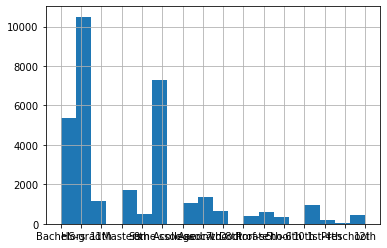

In [51]:
df.education.hist(bins = 20)

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [64]:
df.groupby([df['marital-status'] == 'Divorced'])['fnlwgt'].mean().values[1]

185802.79045689848

In [69]:
df.groupby([df['marital-status'] == 'Divorced'])['fnlwgt'].std().values[1]

105646.78945933616

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [153]:
count_educP = df[(df['50K'] == '>50K')&(df['education'].str.contains('Bachelors|Masters|Doctorate'))]['sex'].count()
count_all = df[(df['50K'] == '>50K')]['sex'].count()
if count_educP  > (count_all - count_educP):
    print(True)
else: 
    print(False)

False


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [27]:
df.groupby(['sex', 'race'])['age'].max()

sex     race              
Female  Amer-Indian-Eskimo    80
        Asian-Pac-Islander    75
        Black                 90
        Other                 74
        White                 90
Male    Amer-Indian-Eskimo    82
        Asian-Pac-Islander    90
        Black                 90
        Other                 77
        White                 90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [77]:
df[(df['occupation'] == 'Farming-fishing')].groupby('native-country').size()

native-country
?                  5
Cambodia           1
Canada             2
Cuba               2
El-Salvador        2
England            1
France             1
Germany            1
Guatemala          4
Hong               1
Ireland            1
Italy              2
Japan              1
Mexico            77
Philippines        4
Poland             1
Portugal           1
Puerto-Rico        5
United-States    879
Vietnam            2
Yugoslavia         1
dtype: int64

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [96]:
male_bac = df[(df['education'] == 'Bachelors')&(df['sex'] == 'Male')]['sex'].count()
male_mas = df[(df['education'] == 'Masters')&(df['sex'] == 'Male')]['sex'].count()

(3.14743049705139, 3736, 1187)

In [98]:
female_bac = df[(df['education'] == 'Bachelors')&(df['sex'] == 'Female')]['sex'].count()
female_mas = df[(df['education'] == 'Masters')&(df['sex'] == 'Female')]['sex'].count()

(3.0205223880597014, 1619, 536)

In [99]:
if (male_bac/male_mas) > (female_bac/female_mas):
    print('Количество мужчин-бакалавров к количеству мужчин-магистров больше')
else:
    print("Количество женщин-бакалавров к количеству женщин-магистров больше")

Количество мужчин-бакалавров к количеству мужчин-магистров больше


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

Максимальное количество рабочих часов в неделю

In [133]:
max = df['hours-per-week'].max()
max

99

Количество людей работающих столько часов в неделю

In [137]:
count_p = df[df['hours-per-week'] == max]['sex'].count()
count_p

85

In [ ]:
Заработок

In [168]:
# df[(df['hours-per-week'] == max)&(df['50K'] == '>50K')]['sex'].count()
# df[(df['hours-per-week'] == max)&(df['50K'] == '<=50K')]['sex'].count()
df.groupby(['50K', 'hours-per-week'])